In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

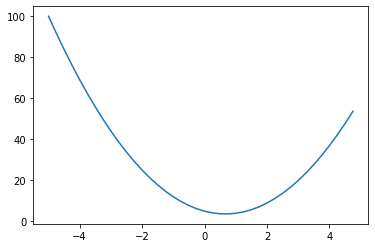

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys);

$\textbf{Wikipedia}$:

A function of a real variable $f(x)$ is $\textit{differentiable}$ at a point $a$ of its domain, if its domain contains an open interval $I$ containing $a$, and the limit $L=\lim_{h\to 0}\frac{f(a+h)-f(a)}{h}$ exists.

Let's have a numerical approximation of the derivate at $x=3.0$ with a small $h=0.001$.

In [5]:
h = 0.001
x = 3.0
(f(x+h) - f(x))/h

14.00300000000243

We have to make $h$ very small to converge to the exact derivative.

In [6]:
h = 0.000000001
x = 3.0
(f(x+h) - f(x))/h

14.000001158365194

However, if we make $h$ too small, we will get an incorrect answerbecause the computer uses the floating-point arithmetic and the representation of these numbers in the memory is finite.

In [7]:
h = 0.000000000000000001
x = 3.0
(f(x+h) - f(x))/h

0.0

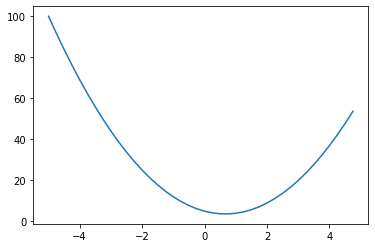

In [8]:
plt.plot(xs, ys);

Let's evaluate the derivate at $x=-3.0$.

In [9]:
h = 0.000001
x = -3.0
(f(x+h) - f(x))/h

-21.999997002808414

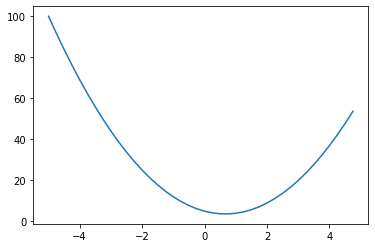

In [10]:
plt.plot(xs, ys);

At $x=\frac{2}{3}$, the derivate will be 0. At the precise point, if we ''nudge'' in the positive direction, the function doesn't respond: it stays the same. The slope is 0.

In [11]:
h = 0.000001
x = 2/3
(f(x+h) - f(x))/h

2.999378523327323e-06

In [12]:
a = 2.0
b = - 3.0
c = 10.0
d = a * b + c
print(d)

4.0


Let's evaluate the derivative of $d$ with respect to all $a,b,c$ at the point $(2.0, -3.0, 10.0)$.

In [13]:
h = 0.0001
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
a += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('derivative', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
derivative -3.000000000010772


We nudge $a$ by $h$.
$a$ is slightly more positive. But $b$ is negative. So, we add less to $d$. The value of the function goes down.
The derivative is negative.

The derivative of $d$ with respect to $b$ will be:

In [14]:
h = 0.0001
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
b += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('derivative', (d2 - d1)/h)

d1 4.0
d2 4.0002
derivative 2.0000000000042206


The derivative of $d$ with respect to $c$ will be:

In [15]:
h = 0.0001
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
c += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('derivative', (d2 - d1)/h)

d1 4.0
d2 4.0001
derivative 0.9999999999976694


If $c$ is nudged by an amount of $h$, $a*b$ is unaffected, $c$ is a little bit higher.

The function is a little bit higher by the exact amount that we add to $c$.

The derivative is 1.

We build the $\texttt{Value}$ class.

In [16]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

a = Value(2.0)
a

Value(data=2.0)

Next, we try to add two $\texttt{Value}$ objects.

In [17]:
a = Value(2.0)
b = Value(-3.0)
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [18]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

In [19]:
a = Value(2.0)
b = Value(-3.0)
a + b

Value(data=-1.0)

When we use the $+$ operator, Python will internally call $\texttt{a.__add__(b)}$.

In [20]:
a.__add__(b)

Value(data=-1.0)

Now, let's add the multiply operator.

In [21]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c

Python internally calls $\texttt{(a.__mul__(b)).__add__(c)}$

In [22]:
(a.__mul__(b)).__add__(c)

Value(data=4.0)

We need to keep $\textbf{pointers}$ about which $\texttt{Value}$ produces which other $\texttt{Value}$

In [23]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
d

Value(data=4.0)

In [24]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

Create a function that draws a computation graph for a root node.

In [25]:
from graphviz import Digraph

def trace(root):
    # build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

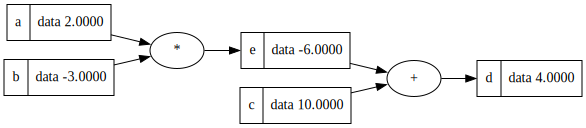

In [26]:
draw_dot(d)

In [27]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
draw_dot(L)

Now, we add a variable to the $\texttt{Value}$ class to maintain the derivative of $L$ with respect to that value.

In [28]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        # Assume that in the beginning the value does not affect the output L
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

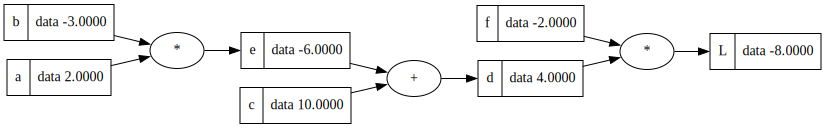

In [29]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
draw_dot(L)

In [30]:
from graphviz import Digraph

def trace(root):
    # build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

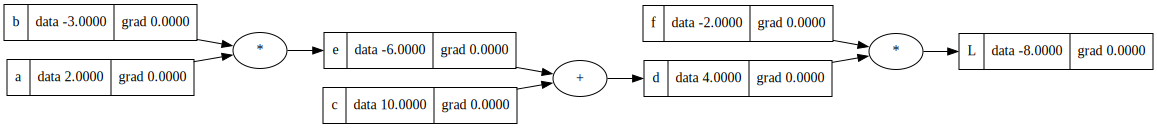

In [31]:
draw_dot(L)

Let's fill the gradient manually.

In [32]:
def gradient_check():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data + h
    
    print((L2 - L1)/h)
gradient_check()

1.000000000000334


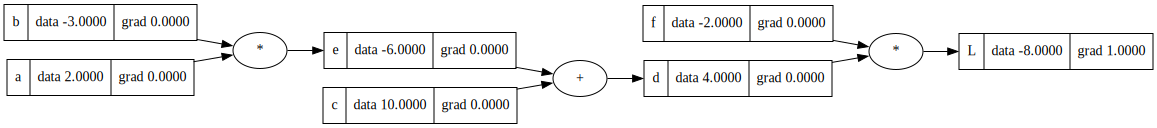

In [33]:
L.grad = 1.0
draw_dot(L)

$L = d \times f$

What is $\frac{\partial L}{\partial d}$?

$\frac{(f(x+h)-f(x))}{h}=\frac{(d+h)\times f - d\times f}{h}=\frac{h\times f}{h}=f$

Then $\frac{\partial L}{\partial f}=d$.

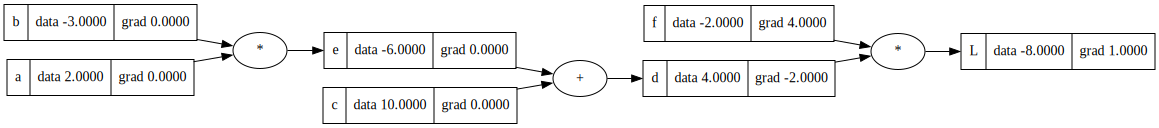

In [34]:
d.grad = -2.0
f.grad = 4.0
draw_dot(L)

In [35]:
def gradient_check():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0 + h, label='f') #
    L = d * f; L.label='L'
    L2 = L.data
    
    print((L2 - L1)/h)
gradient_check()

3.9999999999995595


In [36]:
def gradient_check():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    d.data += h
    f = Value(-2.0, label='f') #
    L = d * f; L.label='L'
    L2 = L.data
    
    print((L2 - L1)/h)
gradient_check()

-2.000000000000668


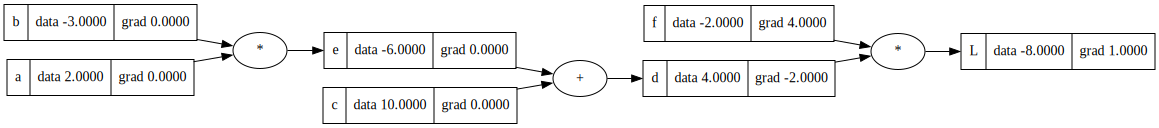

In [37]:
draw_dot(L)

Next, let's derive $\frac{\partial L}{\partial c}$.
If we nudge $c$, how does that impact $L$?

What is the derivative of $d$ with respect to $c$? $\frac{\partial d}{\partial c}=?$

$d = c + e$

$\frac{f(x+h)-f(x)}{h}=\frac{(c+h + e) - (c+e)}{h}=\frac{h}{h}=1$

Similarly, the derivative of $d$ wrt to $e$ is $\frac{\partial d}{\partial e}=1$.

We call these the $\textbf{local derivatives}$.

We're looking at the '+' node, not the entire computation graph. 

We consider the local influences of $c$ on $d$ (i.e., $\frac{\partial d}{\partial c}$), and of $e$ on $d$ (i.e., $\frac{\partial d}{\partial e}$).

But we ultimately want to compute $\frac{\partial L}{\partial c}$.

$\textbf{Wikipedia: The Chain Rule}$

If a variable $z$ depends on the variable $y$, which itself depends on the variable $x$, then $z$ depends on $x$ as well, via the immediate variable $y$.

In this case, the chain rule is:

$\frac{\partial z}{\partial x}=\frac{\partial z}{\partial y}\cdot\frac{\partial y}{\partial x} $


Example: If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels $2\times 4=8$ times as fast as the man.

Let $z,y, x$ be the variable positions of the car, the bicycle, and the walking man.

The rate of change of relative positions of the car and the bicycle is $\frac{\partial z}{\partial y}=2$.

The rate of change of relative positions of the bicycle and the walking is $\frac{\partial y}{\partial x}=4$.

So, the rate of change of the relative positions of the car and the walking man is:

$\frac{\partial z}{\partial x}=\frac{\partial z}{\partial y}\cdot\frac{\partial y}{\partial x}=2\cdot 4=8$.

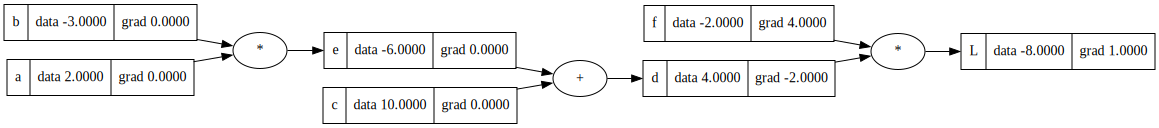

In [38]:
draw_dot(L)

Applying chain rule,

$\frac{\partial L}{\partial c}=\frac{\partial L}{\partial d}\cdot\frac{\partial d}{\partial c}=-2.0\times 1.0=-2.0=\frac{\partial L}{\partial d}$

$\frac{\partial L}{\partial e}=\frac{\partial L}{\partial d}\cdot\frac{\partial d}{\partial e}=-2.0\times 1.0=-2.0=\frac{\partial L}{\partial d}$

The '+' node just routes the derivative $\frac{\partial L}{\partial d}$ backward to $e$ and $c$.

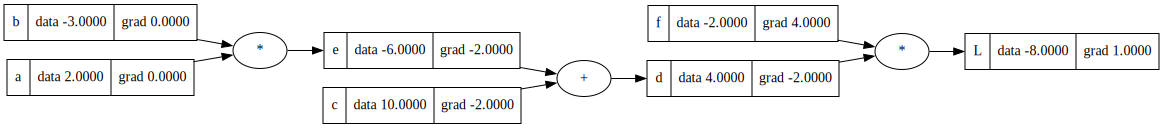

In [39]:
c.grad = -2.0
e.grad = -2.0
draw_dot(L)

In [40]:
def gradient_check():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    c.data += h
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f') #
    L = d * f; L.label='L'
    L2 = L.data
    
    print((L2 - L1)/h)
gradient_check()

-1.9999999999988916


In [41]:
def gradient_check():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    e.data += h
    d = e + c; d.label='d'
    f = Value(-2.0, label='f') #
    L = d * f; L.label='L'
    L2 = L.data
    
    print((L2 - L1)/h)
gradient_check()

-2.000000000000668


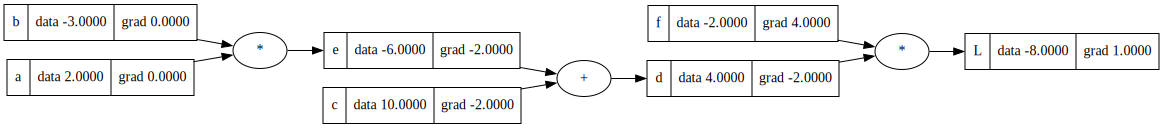

In [42]:
draw_dot(L)

Now, we compute the derivative:

$\frac{\partial L}{\partial a}=\frac{\partial L}{\partial e}\frac{\partial e}{\partial a}=-2.0\times -3.0=6.0$

$\frac{\partial L}{\partial b}=\frac{\partial L}{\partial e}\frac{\partial e}{\partial b}=-2.0\times 2.0=-4.0$

In [43]:
def gradient_check():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data

    a = Value(2.0, label='a')
    a.data +=h
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f') #
    L = d * f; L.label='L'
    L2 = L.data
    
    print((L2 - L1)/h)
gradient_check()

6.000000000000227


In [44]:
def gradient_check():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f') #
    L = d * f; L.label='L'
    L2 = L.data
    
    print((L2 - L1)/h)
gradient_check()

-3.9999999999995595


In [45]:
a.grad = 6.0
b.grad = -4.0
draw_dot(L)

We've just done manual backpropagation with a computation graph. 

We process each node in the graph one by one, and locally apply the **chain rule**.

For each node, we know the derivative of $L$ wrt to the output of the node.

And we look at how this output is produced. This output is produced by some operation, and we have the pointers to the children nodes of this operation. We can compute the **local derivatives**.

We then multiply the local derivatives with the derivative of $L$ wrt to the output of the node.

Let's nudge every input variable a bit to get $L$ go down.

In [46]:
a.data -= 0.01 * a.grad
b.data -= 0.01 * b.grad 
c.data -= 0.01 * c.grad
f.data -= 0.01 * f.grad

# Run the forward pass
e = a * b
d = e + c
L = d * f

print(L.data)

-8.726303999999999


This is one step of the optimization (when we want to minimize $L$).

Next, let's try to build a neural network and backpropagate through it.

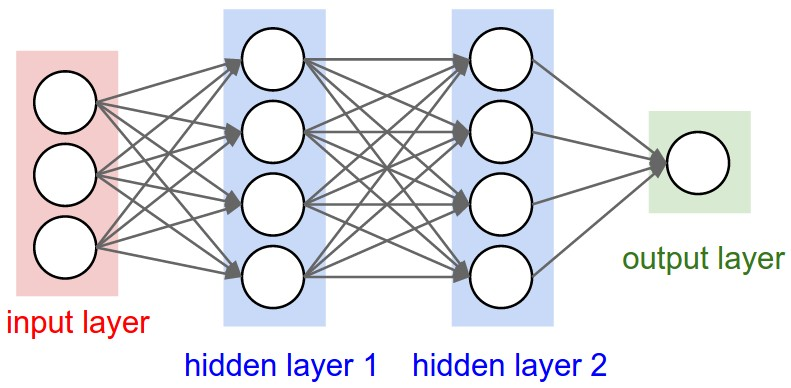

A real neuron looks very complicated.

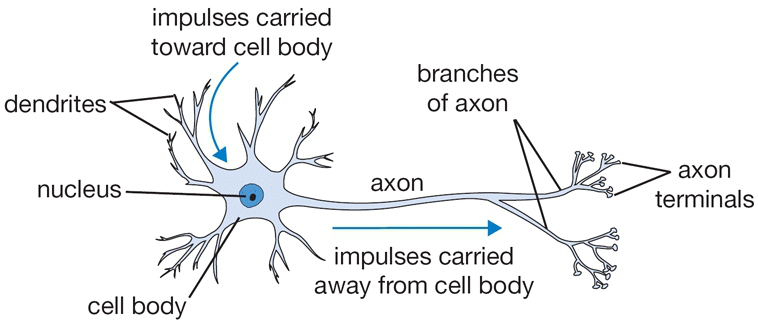

A simple mathematical model of the neuron.

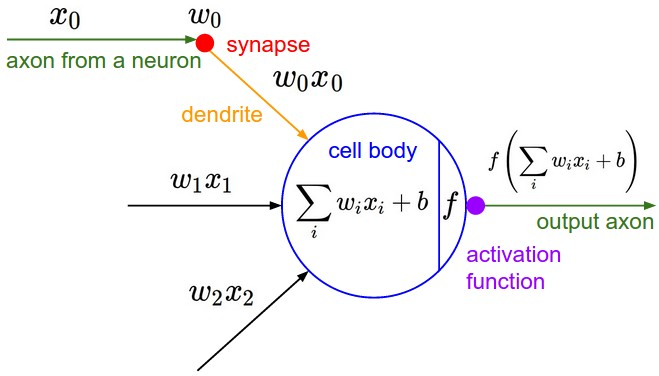

The tanh activation function.

$f(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}=\frac{e^{2x}-1}{e^{2x}+1}$

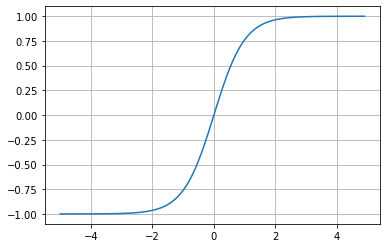

In [47]:
xs = np.arange(-5, 5, 0.1)
ys = np.tanh(xs)
plt.plot(xs, ys)
plt.grid()

Let's add the tanh function to the $\texttt{Value}$ class.

In [48]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data        
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')
        return out

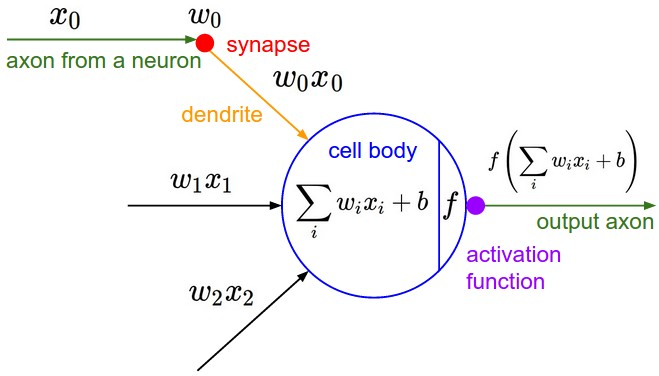

In [49]:
# inputs x1, x2
x1 = Value(2.0, label='x1');x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1'); w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.7, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1*w1 + x2*w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

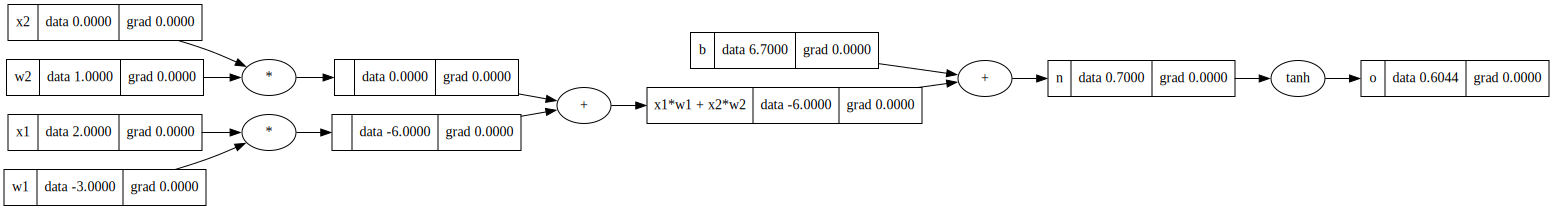

In [50]:
draw_dot(o)

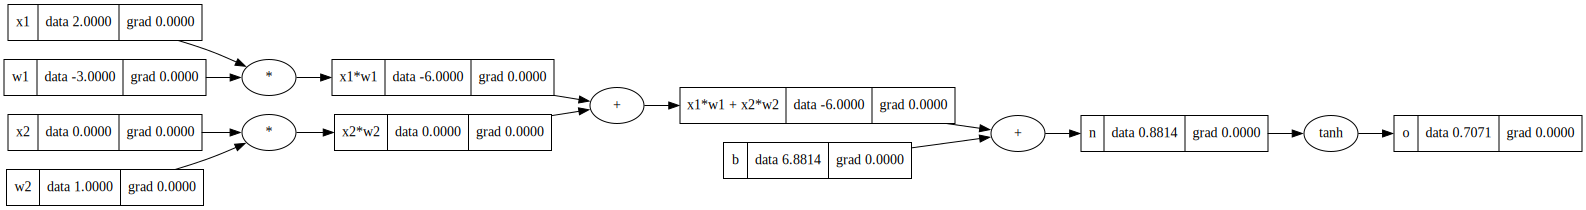

In [51]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

Now, let's backprop through this neuron.

The derivative of $o$ wrt to $o$ is 1.

In [52]:
o.grad = 1.0
draw_dot(o)

Next, let's compute 

$\frac{\partial o}{\partial n}=\frac{\partial}{\partial n}tanh(n)=1-tanh^2 n$.

In [53]:
print(1-o.data**2)

0.4999999999999999


In [54]:
n.grad = 0.5
draw_dot(o)

In the previous example, we know that the derivative is simply routed through a '+' node to the children nodes.

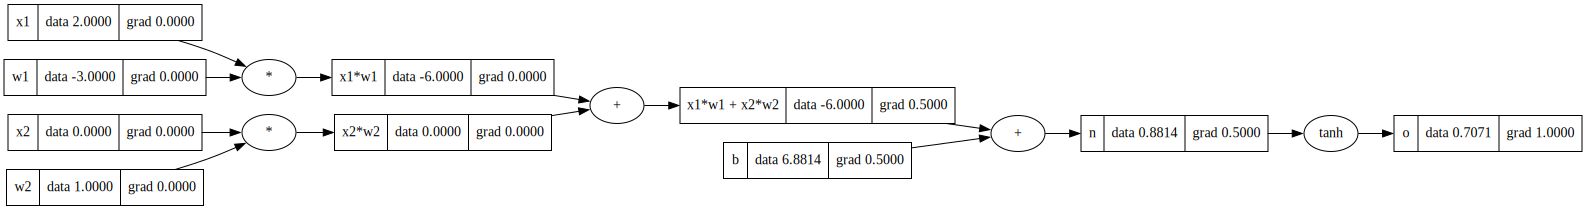

In [55]:
x1w1x2w2.grad = 0.5
b.grad = 0.5
draw_dot(o)

Again, the derivative is routed to the node $\texttt{x1*w1}$ and $\texttt{x2*w2}$ because of the '+' operator node.

In [56]:
x1w1.grad = 0.5
x2w2.grad = 0.5
draw_dot(o)

Next, we compute $\frac{\partial o}{\partial x_1}$ and $\frac{\partial o}{\partial w_1}$.

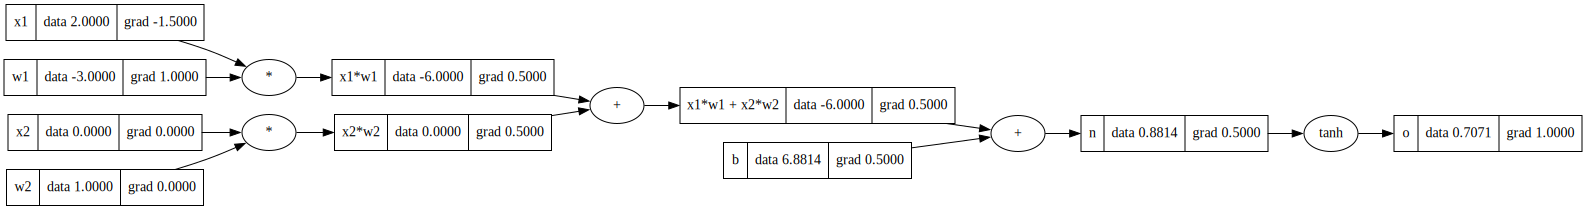

In [57]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
draw_dot(o)

Next, we compute $\frac{\partial o}{\partial x_2}$ and $\frac{\partial o}{\partial w_2}$.

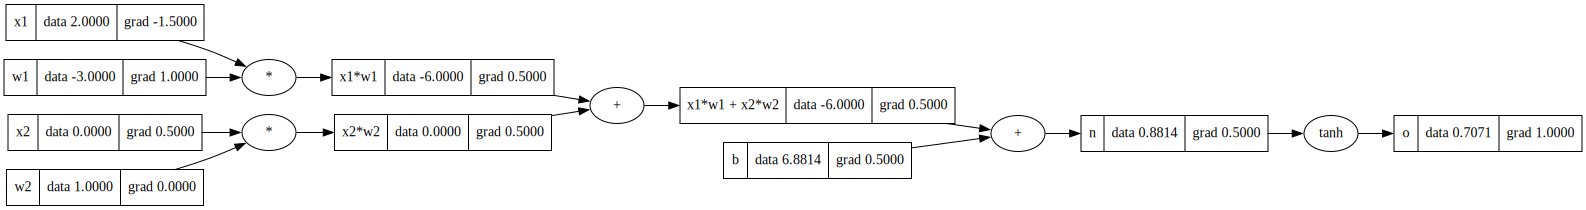

In [58]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
draw_dot(o)

Why is the derivative of $o$ wrt to $w_2$ is 0.0?

The derivative tells us if we nudge the variable, how does that impact the final output.

Here, if we nudge $w_2$, the output $o$ doesn't change at all, because $w_2$ is multiplied by $x_2=0.0$. Thus, $\frac{\partial o}{\partial w_2}=0.0$.


# Automatic backpropagation

Let's define the $\texttt{backward}$ function for the $\texttt{Value}$ class to chain the output gradient to the input gradient of a node.

In [59]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data        
        self.grad = 0.0
        self._backward = lambda: None # an empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')
        return out

In [ ]:
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward 
        return out

In [ ]:
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward()
        return out

In [ ]:
    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

In [60]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data        
        self.grad = 0.0
        self._backward = lambda: None # an empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward 
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

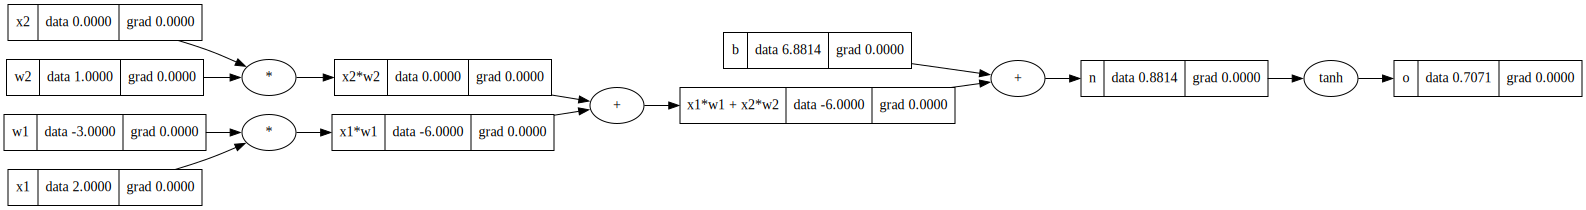

In [61]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [62]:
o._backward()

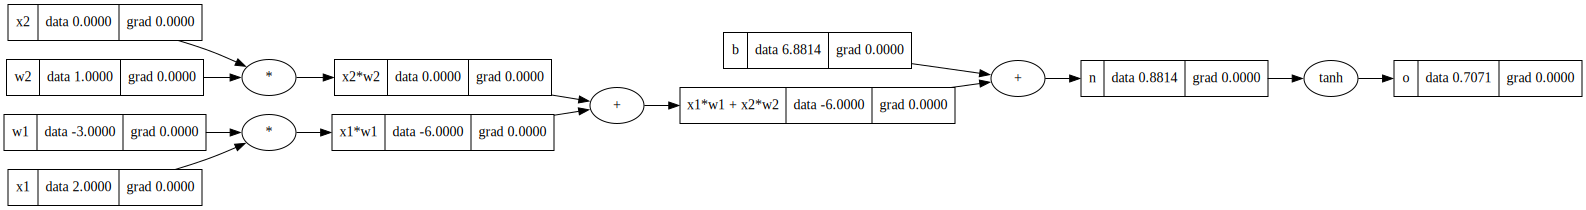

In [63]:
draw_dot(o)

For backpropagation, we need to initialize the chain with 1.0.

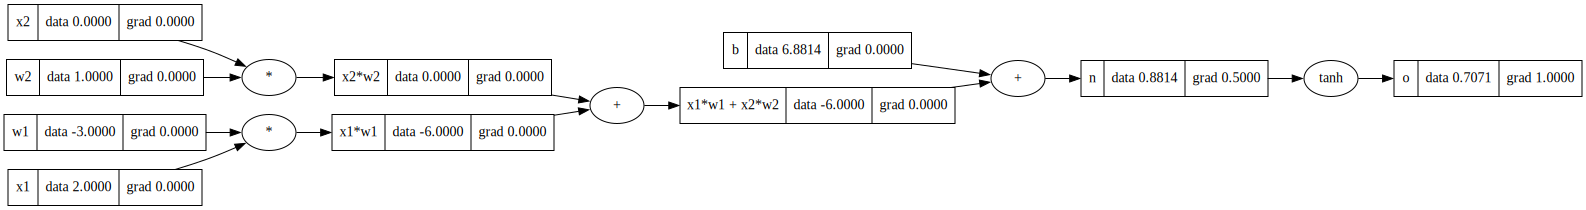

In [64]:
o.grad = 1.0
o._backward()
draw_dot(o)

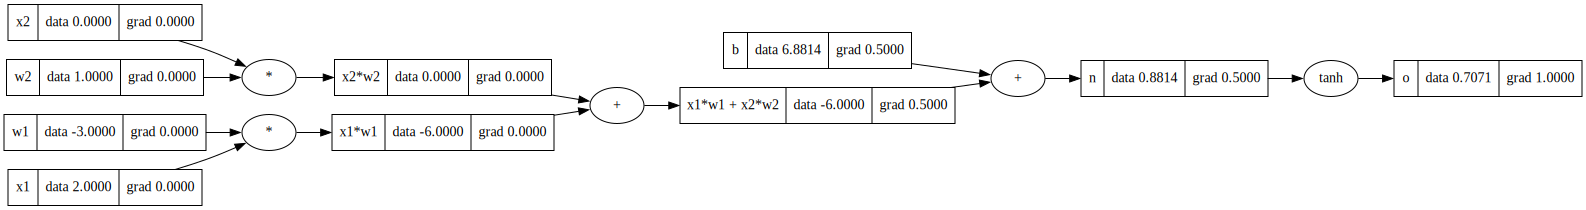

In [65]:
n._backward()
draw_dot(o)

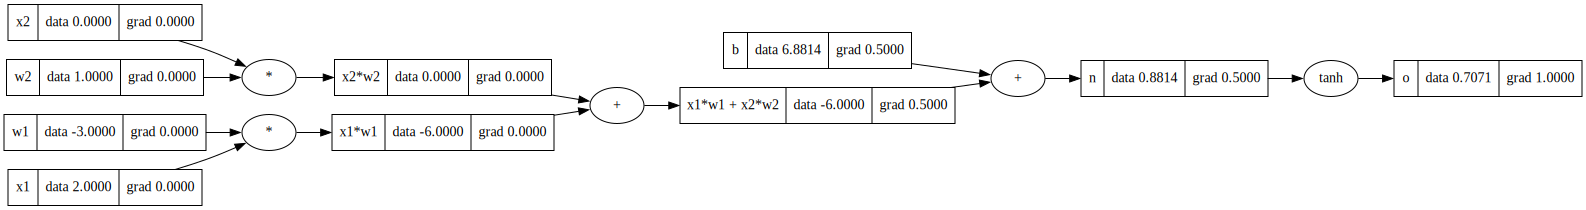

In [66]:
b._backward()
draw_dot(o)

In [67]:
x1w1x2w2._backward()
draw_dot(o)

In [68]:
x1w1._backward()
draw_dot(o)

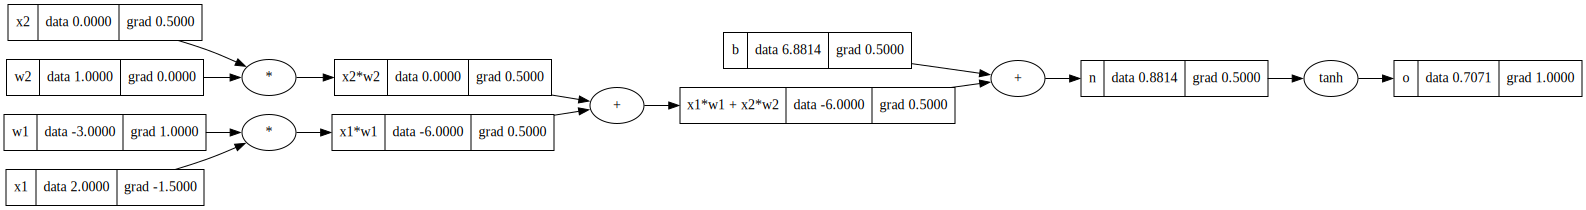

In [69]:
x2w2._backward()
draw_dot(o)

Now, let's automate the backpropagation.

We will use $\texttt{topological sort}$ to ensure the right order of the nodes to call the $\texttt{_backward}$ function.

**Wikipedia: Topological sort**

A **topological sort** or **topological ordering** of a **directed graph** is a **linear ordering** of its **vertices** such that for every directed edge $uv$ from vertex $u$ to vertex $v$, $u$ comes before $v$ in the ordering.

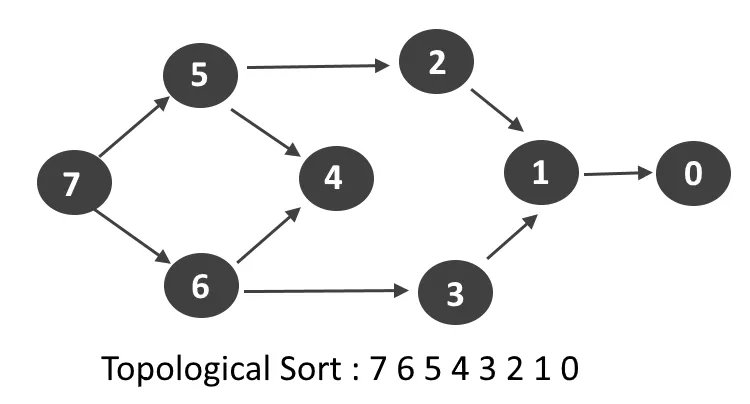

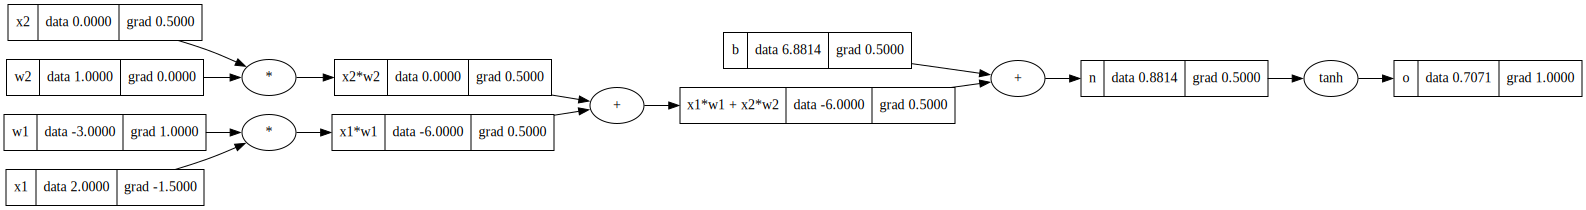

In [70]:
draw_dot(o)

In [71]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v) # add the node to the topo list after all its chidren have been processed.
build_topo(o)
topo

[Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

First, reset the gradients.

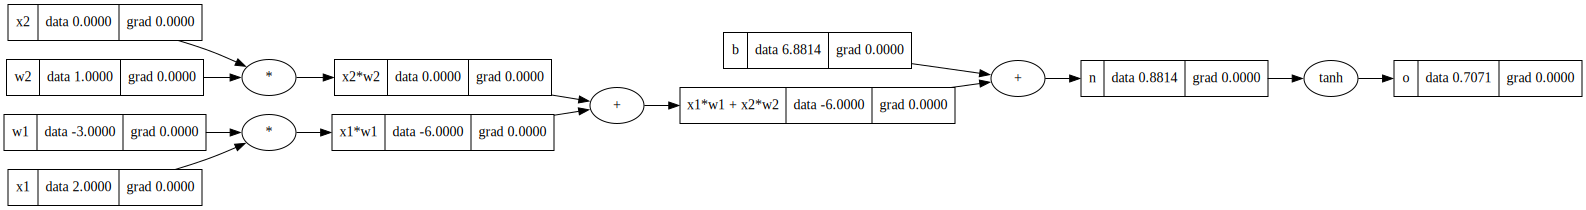

In [72]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

Then, we call $\texttt{_backward()}$ function on the **reversed** order of the topological sort list.

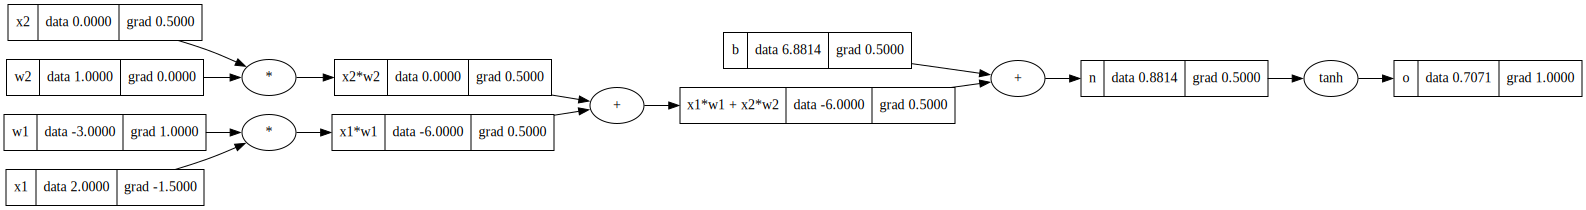

In [73]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v) # add the node to the topo list after all its chidren have been processed.
build_topo(o)

for node in reversed(topo):
    node._backward()

draw_dot(o)

Let put the backpropagation inside the $\texttt{Value}$ class.

In [74]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data        
        self.grad = 0.0
        self._backward = lambda: None # an empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        for node in reversed(topo):
            node._backward()        
            
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward 
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out


Reset the gradients again.

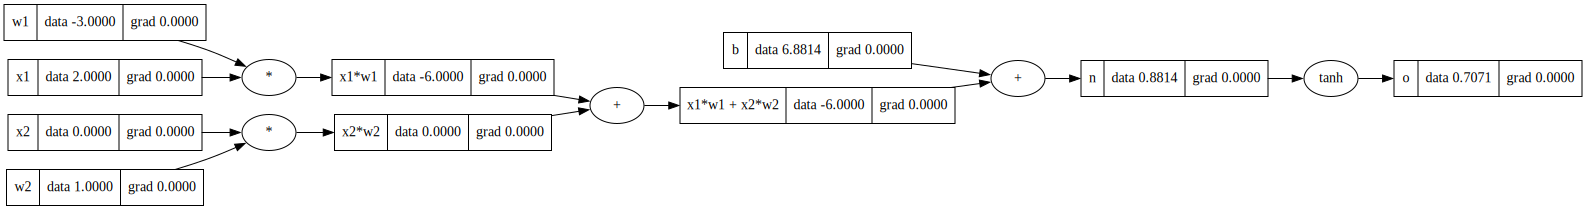

In [75]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

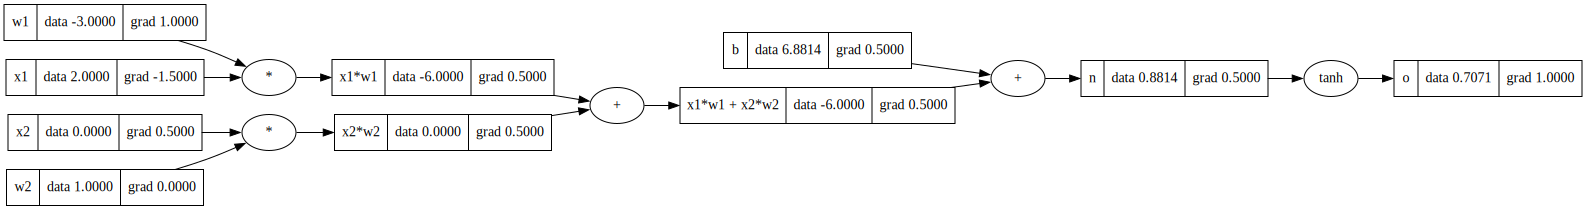

In [76]:
o.backward()
draw_dot(o)

That's backpropagation for one neuron.

But there's still a bug in the code.

In [77]:
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()

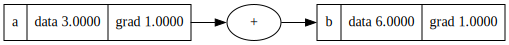

In [78]:
draw_dot(b)

In [79]:
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward 
        return out

We overwrite the derivatives of $b$ wrt $a$.

We have this overwriting issue when we use a variable more than once.

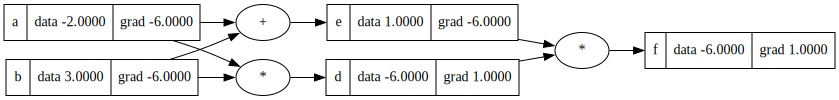

In [80]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()
draw_dot(f)

When we call $\texttt{e._backward()}$, it computes the gradients for $a$ and $b$.

But then, when we call $\texttt{d._backward()}$, it overwrites the gradients at $a$ and $b$.

We need to modify the $\texttt{_backward()}$ to accumulate the gradients instead of setting the gradients.

In [81]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data        
        self.grad = 0.0
        self._backward = lambda: None # an empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label  
            
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward 
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def __repr__(self):
        return f"Value(data={self.data})"   

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        for node in reversed(topo):
            node._backward()   


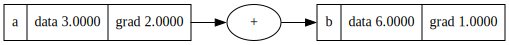

In [82]:
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

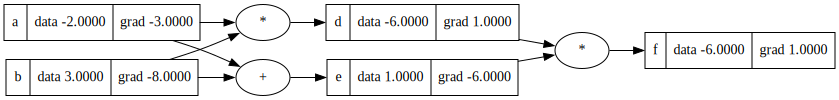

In [83]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()
draw_dot(f)

Let's clean up the code.

In [84]:
a = Value(2.0)
a + 1

AttributeError: 'int' object has no attribute 'data'

In [85]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data        
        self.grad = 0.0
        self._backward = lambda: None # an empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label  
            
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward 
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def __repr__(self):
        return f"Value(data={self.data})"   

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        for node in reversed(topo):
            node._backward()   


In [86]:
a = Value(2.0)
2 + a

TypeError: unsupported operand type(s) for +: 'int' and 'Value'

In [87]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data        
        self.grad = 0.0
        self._backward = lambda: None # an empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label  
            
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward 
        return out
        
    def __radd__(self, other): # other * self
        return self + other
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self, other): # other * self
        return self * other

    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def __repr__(self):
        return f"Value(data={self.data})"   

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        for node in reversed(topo):
            node._backward()  

Let's define the $\texttt{exp}$ operator.

In [88]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data        
        self.grad = 0.0
        self._backward = lambda: None # an empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label  

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
            
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward 
        return out
        
    def __radd__(self, other): # other * self
        return self + other
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self, other): # other * self
        return self * other

    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def __repr__(self):
        return f"Value(data={self.data})"   

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        for node in reversed(topo):
            node._backward()  

In [89]:
a = Value(2.0)
a.exp()

Value(data=7.38905609893065)

Next, let's implement the division '/' operator.

$a/b=a \times (1/b) = a \times b^{-1}$

Thus, let's defind the $\texttt{pow}$ operator $x^k$ instead.

In [90]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data        
        self.grad = 0.0
        self._backward = lambda: None # an empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label  
    
    def __pow__(self, other):
        assert isinstance(other, (int, float))
        out = Value(self.data**other, (self,), f'**{other}')
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        return out

    def __truediv__(self, other):
        return self * other**-1
        
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
            
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward 
        return out
        
    def __radd__(self, other): # other * self
        return self + other
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self, other): # other * self
        return self * other

    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def __repr__(self):
        return f"Value(data={self.data})"   

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        for node in reversed(topo):
            node._backward()  

In [91]:
a = Value(2.0)
b = Value(4.0)
a / b

Value(data=0.5)

Also, we define the $\texttt{sub}$ ('-') operator. 

In [92]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data        
        self.grad = 0.0
        self._backward = lambda: None # an empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label  
    
    def __neg__(self): # -self
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)
    
    def __pow__(self, other):
        assert isinstance(other, (int, float))
        out = Value(self.data**other, (self,), f'**{other}')
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        return out

    def __truediv__(self, other):
        return self * other**-1
        
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
            
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward 
        return out
        
    def __radd__(self, other): # other * self
        return self + other
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self, other): # other * self
        return self * other

    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def __repr__(self):
        return f"Value(data={self.data})"   

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        for node in reversed(topo):
            node._backward()  

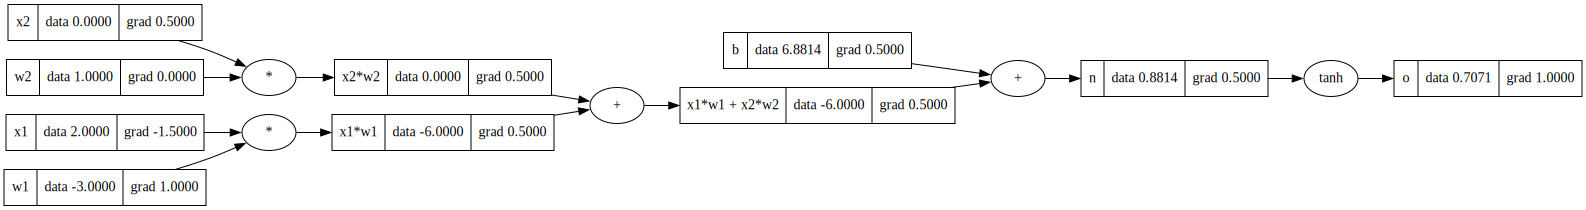

In [93]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()
draw_dot(o)

Let's break up the $\texttt{tanh}$ function.

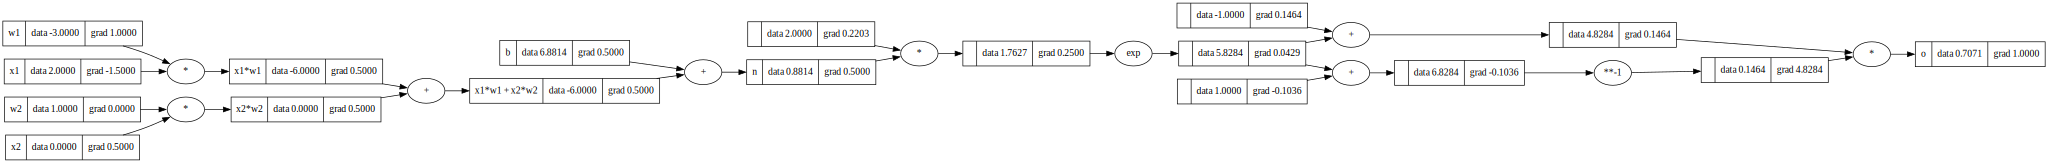

In [94]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e - 1)/(e + 1)
             
o.label = 'o'
o.backward()
draw_dot(o)

We can implement the same thing with Pytorch.

In [95]:
import torch

In [96]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('o', o.item())
print('x1.grad', x1.grad.item())
print('w1.grad', w1.grad.item())
print('x2.grad', x2.grad.item())
print('w2.grad', w2.grad.item())

0.7071066904050358
---
o 0.7071066904050358
x1.grad -1.5000003851533106
w1.grad 1.0000002567688737
x2.grad 0.5000001283844369
w2.grad 0.0


Let's build the $\texttt{Neuron}$ class.

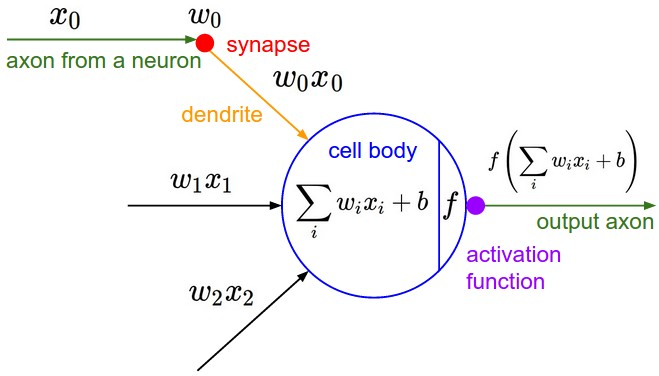

In [97]:
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    def __call__(self, x):
        return 0.0

x = [2.0, 3.0]
n = Neuron(2)
n(x)

0.0

Let's define the $\texttt{__call__}$ function.

In [98]:
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # w * x + b
        # pre_act = sum(wi*xi for wi, xi in zip(self.w, x)) + self.b
        pre_act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = pre_act.tanh()
        return out

x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=0.9971020974081622)

Next, let's define a $\texttt{Layer}$ of the $\texttt{Neuron}$s.

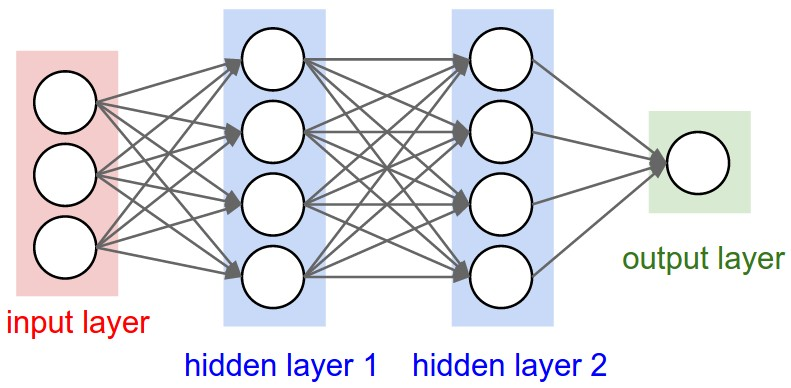

Each layer has a number of neurons. The neurons in the same layer are not connected to each other. But they are fully connected to the inputs.

Thus, each neuron in a layer is evaluated independently.

In [99]:
class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs

x = [2.0, 3.0]
n = Layer(2, 3)
n(x)


[Value(data=0.9648149030934785),
 Value(data=-0.19028066192909948),
 Value(data=0.8865753121635551)]

Next, let's define a fully-connected neural networks (or a multi-layer perceptron $\texttt{MLP}$).

In [100]:
class MLP:

    def __init__(self, nin, nouts): # nouts is a list define the sizes of all the layers.
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

x = [2.0, 3.0, -1.0]
net = MLP(3, [4, 4, 1])
net(x)

[Value(data=0.9221215795068683)]

We change the return format of $\texttt{Layer}$ if there is only one ouput.

In [101]:
class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

class MLP:

    def __init__(self, nin, nouts): # nouts is a list define the sizes of all the layers.
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

x = [2.0, 3.0, -1.0]
net = MLP(3, [4, 4, 1])
net(x)

Value(data=-0.8906053493955972)

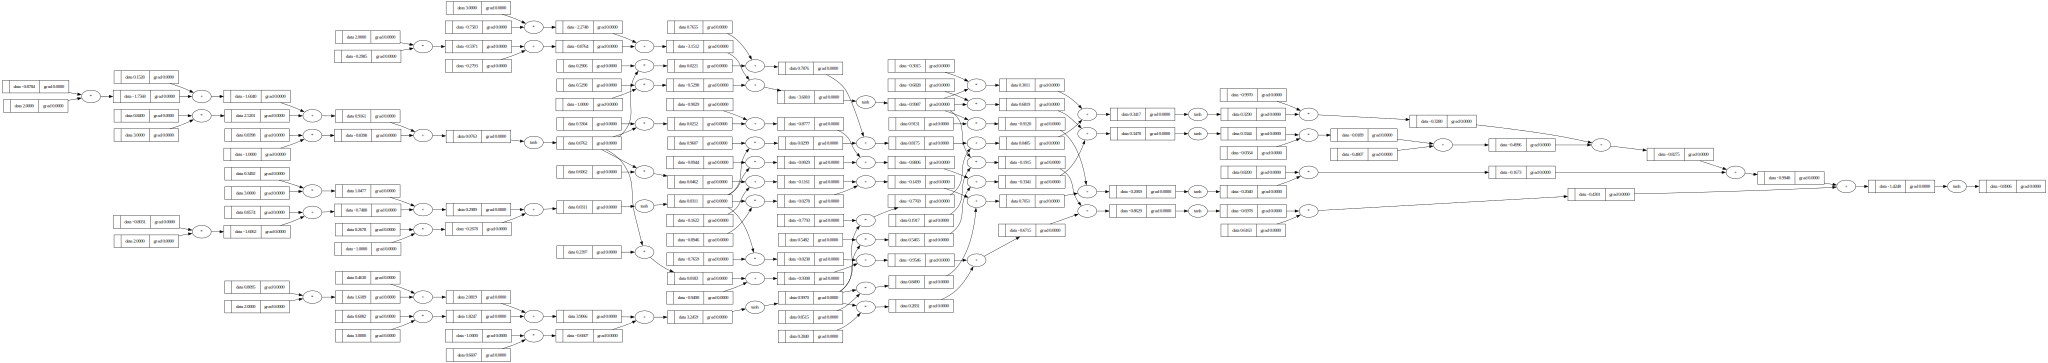

In [102]:
o = net(x)
draw_dot(o)

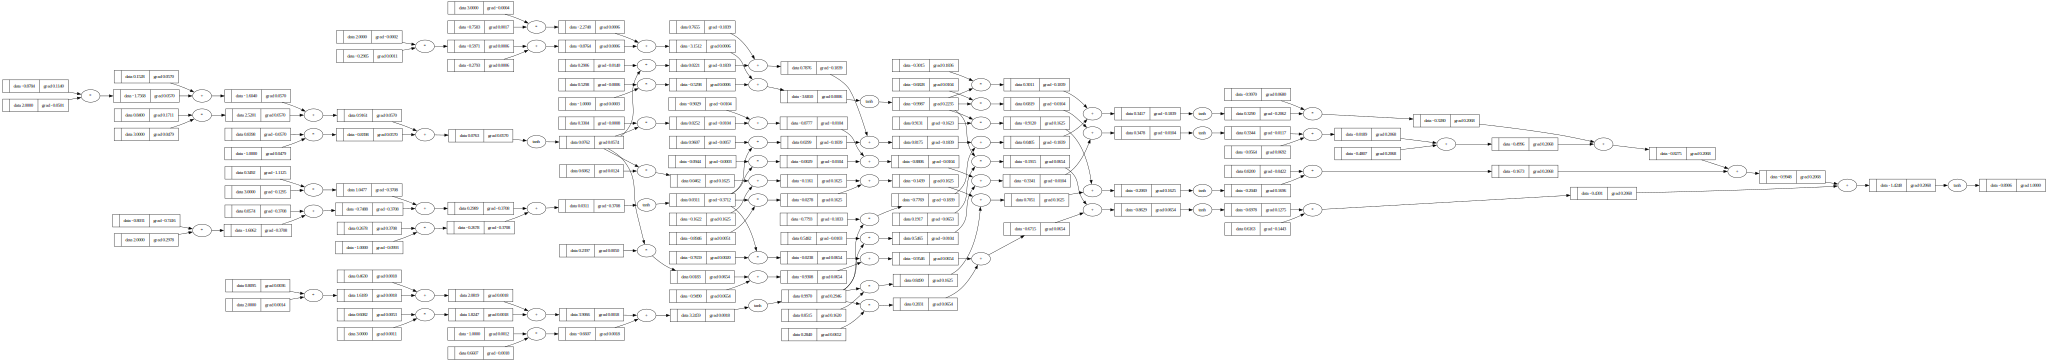

In [103]:
o.backward()
draw_dot(o)

We create some example data items.

In [104]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

Use the network we create above to make predictions.

In [105]:
net = MLP(3, [4, 4, 1])
ypred = [net(x) for x in xs]
ypred

[Value(data=-0.2489630121421908),
 Value(data=0.8715965347358058),
 Value(data=-0.6811980760576408),
 Value(data=0.6196377303391635)]

We see that the predicted values above are different from the desired targets.

We would like to adjust the model weights so that the predicted values are as close as possible to the target values.

In machine learning, we compute a number to measure the total performance of the model: $\textbf{the loss}$.

In [106]:
[(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]

[Value(data=1.5599086056992943),
 Value(data=3.502873588835076),
 Value(data=0.10163466670934977),
 Value(data=0.14467545618154293)]

Above, we've just implemented squared error loss. 

We would get 0.0 loss if the predicted values are exactly the same as the target values. 

The more different the predictions are from the targets, the higher the losses are.

In [107]:
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=5.309092317425263)

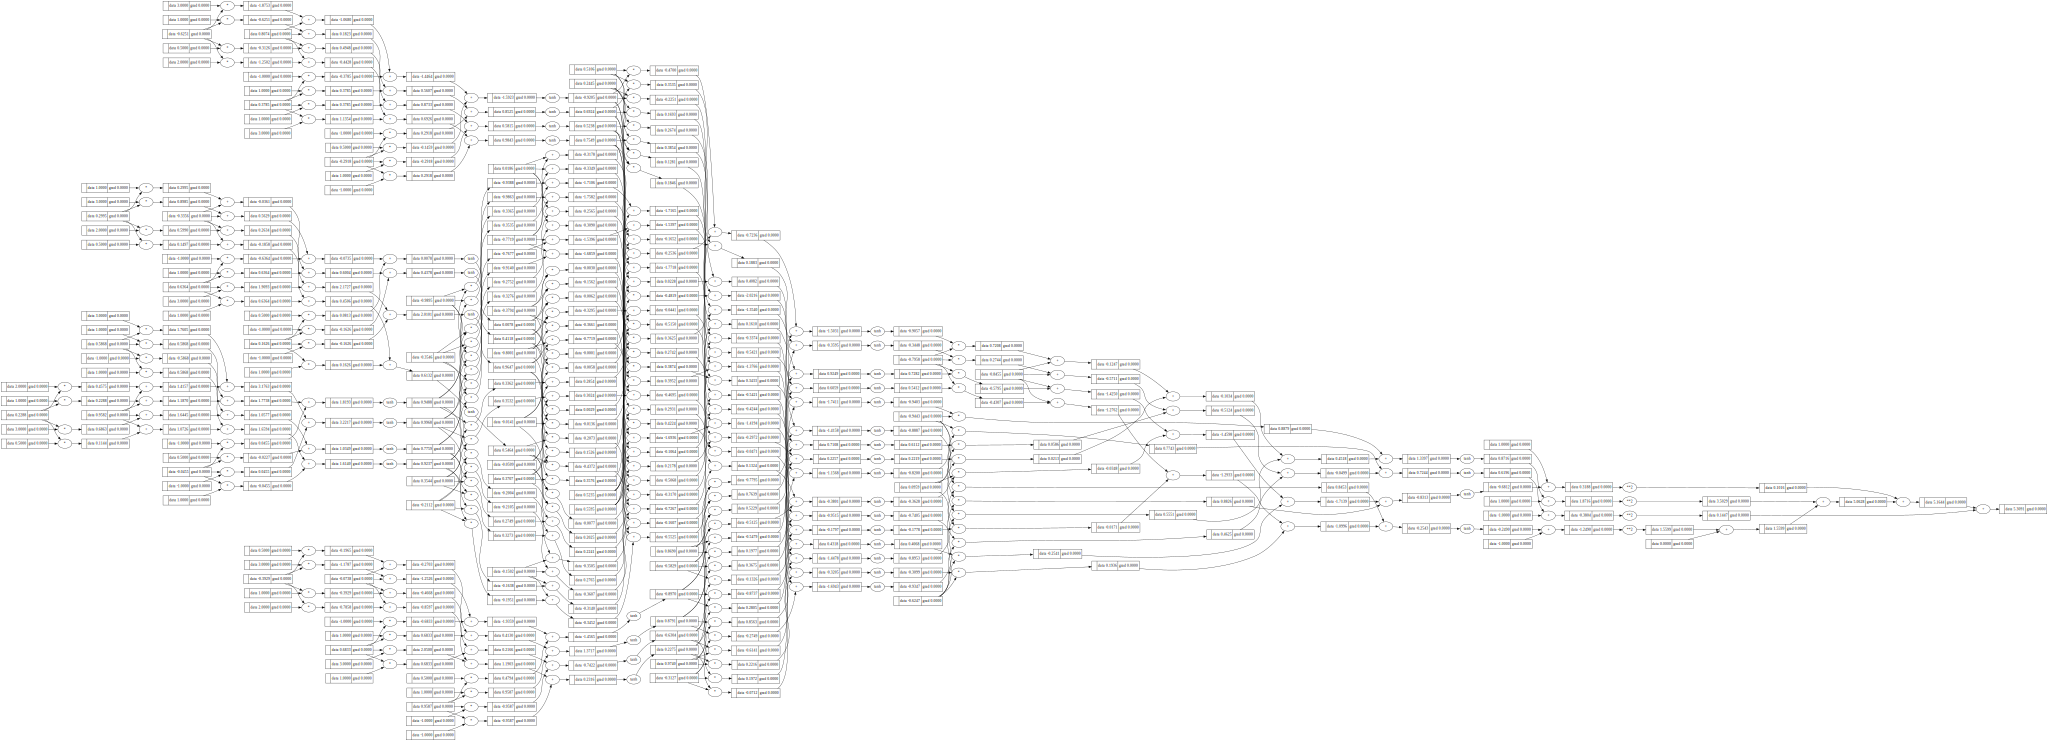

In [108]:
draw_dot(loss)

We want to minimize the $\texttt{loss}$.

In [109]:
loss.backward()

In [110]:
draw_dot(loss)

In [111]:
net.layers[0].neurons[0].w[0].grad

0.19921228258225435

Let's collect the parameters of the neural net into one array.

In [112]:
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        pre_act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = pre_act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]

class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

In [113]:
class MLP:

    def __init__(self, nin, nouts): # nouts is a list define the sizes of all the layers.
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

We initialize the neural net again.

In [114]:
net = MLP(3, [4, 4, 1])

In [115]:
net.parameters()

[Value(data=0.779279017252793),
 Value(data=0.3969499384922428),
 Value(data=-0.1270803948924779),
 Value(data=-0.9270077594975172),
 Value(data=0.4201127286843087),
 Value(data=-0.7448807693693607),
 Value(data=0.0041440256686282595),
 Value(data=0.5379539534157345),
 Value(data=-0.5160079792592704),
 Value(data=0.7423902731425216),
 Value(data=0.0065824449964788645),
 Value(data=-0.9787054947159812),
 Value(data=-0.28684992124341013),
 Value(data=-0.5426915896929567),
 Value(data=0.3633894471663559),
 Value(data=-0.07706230314675344),
 Value(data=-0.7972459420239475),
 Value(data=-0.30374311170021384),
 Value(data=-0.49323162896855943),
 Value(data=0.12647630180574887),
 Value(data=-0.4809099466275042),
 Value(data=0.051873030288825506),
 Value(data=0.24119652845121586),
 Value(data=0.19057436862730626),
 Value(data=-0.23813311733994902),
 Value(data=-0.7994478094964126),
 Value(data=0.43247503986082214),
 Value(data=0.6011557813943709),
 Value(data=-0.8635791522562564),
 Value(data=

We use the neural net to make some predictions.

In [116]:
ypred = [net(x) for x in xs]
ypred

[Value(data=-0.22644203558196366),
 Value(data=0.5592386700382869),
 Value(data=0.5817407748345199),
 Value(data=0.5970366242155654)]

In [117]:
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=6.599668657782892)

We compute the gradients for the neural net.

In [118]:
loss.backward()

In [119]:
for p in net.parameters():
    p.data += -0.01 * p.grad

We use the neural net with the updated parameter values to make new predictions.

In [120]:
ypred = [net(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=5.802513296739368)

The loss value is decreased!!!

In [121]:
print(np.reshape(list(zip(ypred, ys)),(-1,2)))

[[Value(data=-0.03679945003539902) 1.0]
 [Value(data=0.4895247539541595) -1.0]
 [Value(data=0.5254352385606434) -1.0]
 [Value(data=0.5734750447384158) 1.0]]


We perform the gradient descent step a few more times.

In [122]:
loss.backward()
for p in net.parameters():
    p.data += -0.01 * p.grad

ypred = [net(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=4.648284517253495)

In [123]:
loss.backward()
for p in net.parameters():
    p.data += -0.01 * p.grad

ypred = [net(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=3.449340423357603)

In [124]:
loss.backward()
for p in net.parameters():
    p.data += -0.01 * p.grad

ypred = [net(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=2.766808657725006)

In [125]:
loss.backward()
for p in net.parameters():
    p.data += -0.01 * p.grad

ypred = [net(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=2.711414612717566)

In [126]:
print(np.reshape(list(zip(ypred, ys)),(-1,2)))

[[Value(data=-0.057672484847396364) 1.0]
 [Value(data=-0.5235005087833459) -1.0]
 [Value(data=-0.6227128830280881) -1.0]
 [Value(data=-0.10604981522153543) 1.0]]


Let's try some higher learning rate.

In [127]:
loss.backward()
for p in net.parameters():
    p.data += -0.1 * p.grad

ypred = [net(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=6.031793928276806)

In [128]:
print(np.reshape(list(zip(ypred, ys)),(-1,2)))

[[Value(data=-0.681266791661929) 1.0]
 [Value(data=-0.9168851363220331) -1.0]
 [Value(data=-0.9616558702519064) -1.0]
 [Value(data=-0.7879478601685407) 1.0]]


In [129]:
loss.backward()
for p in net.parameters():
    p.data += -0.1 * p.grad

ypred = [net(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=0.29324020620438457)

In [130]:
loss.backward()
for p in net.parameters():
    p.data += -0.1 * p.grad

ypred = [net(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=0.7435881317077061)

In [131]:
print(np.reshape(list(zip(ypred, ys)),(-1,2)))

[[Value(data=0.9723847131858562) 1.0]
 [Value(data=-0.5966533776246309) -1.0]
 [Value(data=-0.23836502754357472) -1.0]
 [Value(data=0.9929858292321705) 1.0]]


These are the parameters of the neural net that make the predictions very close to the targets.

In [132]:
net.parameters()

[Value(data=2.007683339568726),
 Value(data=0.623207029526516),
 Value(data=1.6356044895357011),
 Value(data=0.1206449950875314),
 Value(data=0.4664271965897614),
 Value(data=-0.7948784545951684),
 Value(data=-0.9385030638263715),
 Value(data=-0.05998713425914662),
 Value(data=-2.2674571307835403),
 Value(data=-1.1751524534298512),
 Value(data=4.197606448836096),
 Value(data=-0.028476257723401732),
 Value(data=1.2117550930417724),
 Value(data=-1.1677330574685265),
 Value(data=3.4071711170481764),
 Value(data=1.4660278163377518),
 Value(data=0.20854429335661478),
 Value(data=-1.610778049945286),
 Value(data=0.4546102679593787),
 Value(data=-0.9677425607463708),
 Value(data=-2.0022877534272574),
 Value(data=1.4904115751934142),
 Value(data=-1.6313668387340279),
 Value(data=0.23703330610158185),
 Value(data=-2.516785997307684),
 Value(data=-0.38858783011420267),
 Value(data=1.9268891422941365),
 Value(data=-0.31877556332939216),
 Value(data=-0.10496596524407734),
 Value(data=-1.6227771592

Let's code the training loop for gradient descent.

In [133]:
net = MLP(3, [4, 4, 1])

In [134]:
for k in range(20):
    # forward pass
    ypred = [net(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # backward pass
    loss.backward()

    # gradient descent
    for p in net.parameters():
        p.data += -0.05 * p.grad

    print(k, loss.data)

0 3.9933320357331836
1 2.2059046315300552
2 0.5922341242951784
3 0.07820389606053299
4 0.006195522788391701
5 0.00040092788294321727
6 2.6082340156078613e-05
7 1.7092784015463096e-06
8 1.107064022567934e-07
9 7.15906915117894e-09
10 4.690024321270365e-10
11 3.146782285616066e-11
12 2.176796957470196e-12
13 1.5575164467577798e-13
14 1.153915252054851e-14
15 8.853794815977973e-16
16 7.039797885096251e-17
17 5.814402168775608e-18
18 5.019543873075504e-19
19 4.5924013972509e-20


In [135]:
print(np.reshape(list(zip(ypred, ys)),(-1,2)))

[[Value(data=0.9999999998381004) 1.0]
 [Value(data=-0.9999999999968124) -1.0]
 [Value(data=-0.9999999999986016) -1.0]
 [Value(data=0.9999999998596418) 1.0]]


But, we actually have a bug in the above  training loop.

After the first $\texttt{backward()}$ call, all the $\texttt{grad}$'s have been filled.

Each time we call $\texttt{backward()}$, all the $\texttt{grad}$'s should be reset to 0.0.

Otherwise, because of the $\texttt{+=}$ operator, we accumulate all the previous gradients from the past.

In [136]:
net = MLP(3, [4, 4, 1])

In [137]:
for k in range(20):
    # forward pass
    ypred = [net(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # backward pass
    for p in net.parameters():
        p.grad = 0.0
    loss.backward()

    # gradient descent
    for p in net.parameters():
        p.data += -0.1 * p.grad

    print(k, loss.data)

0 4.384274169022456
1 3.164518815871537
2 1.290854627764673
3 0.7435571436080671
4 0.12160373037342916
5 0.0967073128382535
6 0.08248199442532805
7 0.0725805821616243
8 0.06502395926879269
9 0.05896405752374817
10 0.05395500346277994
11 0.04972812257463356
12 0.046106148469550155
13 0.04296475164783746
14 0.04021293409077083
15 0.03778199202215501
16 0.03561881004648062
17 0.033681543540243594
18 0.03193671239616892
19 0.030357175858588964


In [138]:
print(np.reshape(list(zip(ypred, ys)),(-1,2)))

[[Value(data=0.9196983378276488) 1.0]
 [Value(data=-0.9329828430724685) -1.0]
 [Value(data=-0.8903453506066366) -1.0]
 [Value(data=0.9140152487081826) 1.0]]


In [139]:
for k in range(20):
    # forward pass
    ypred = [net(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # backward pass
    for p in net.parameters():
        p.grad = 0.0
    loss.backward()

    # gradient descent
    for p in net.parameters():
        p.data += -0.05 * p.grad

    print(k, loss.data)

0 0.028920681875082184
1 0.028257541528639747
2 0.027622725514571463
3 0.027014481992038018
4 0.026431199962069673
5 0.025871395388739508
6 0.02533369893718963
7 0.024816845111074164
8 0.02431966260518261
9 0.023841065716520088
10 0.02338004668003268
11 0.022935668814327043
12 0.02250706037882463
13 0.022093409057359507
14 0.0216939569947108
15 0.0213079963223089
16 0.020934865117664514
17 0.020573943749167482
18 0.020224651563992314
19 0.019886443882076322


In [140]:
print(np.reshape(list(zip(ypred, ys)),(-1,2)))

[[Value(data=0.9336916004158635) 1.0]
 [Value(data=-0.9463136565467181) -1.0]
 [Value(data=-0.9117742573743187) -1.0]
 [Value(data=0.930547607014372) 1.0]]


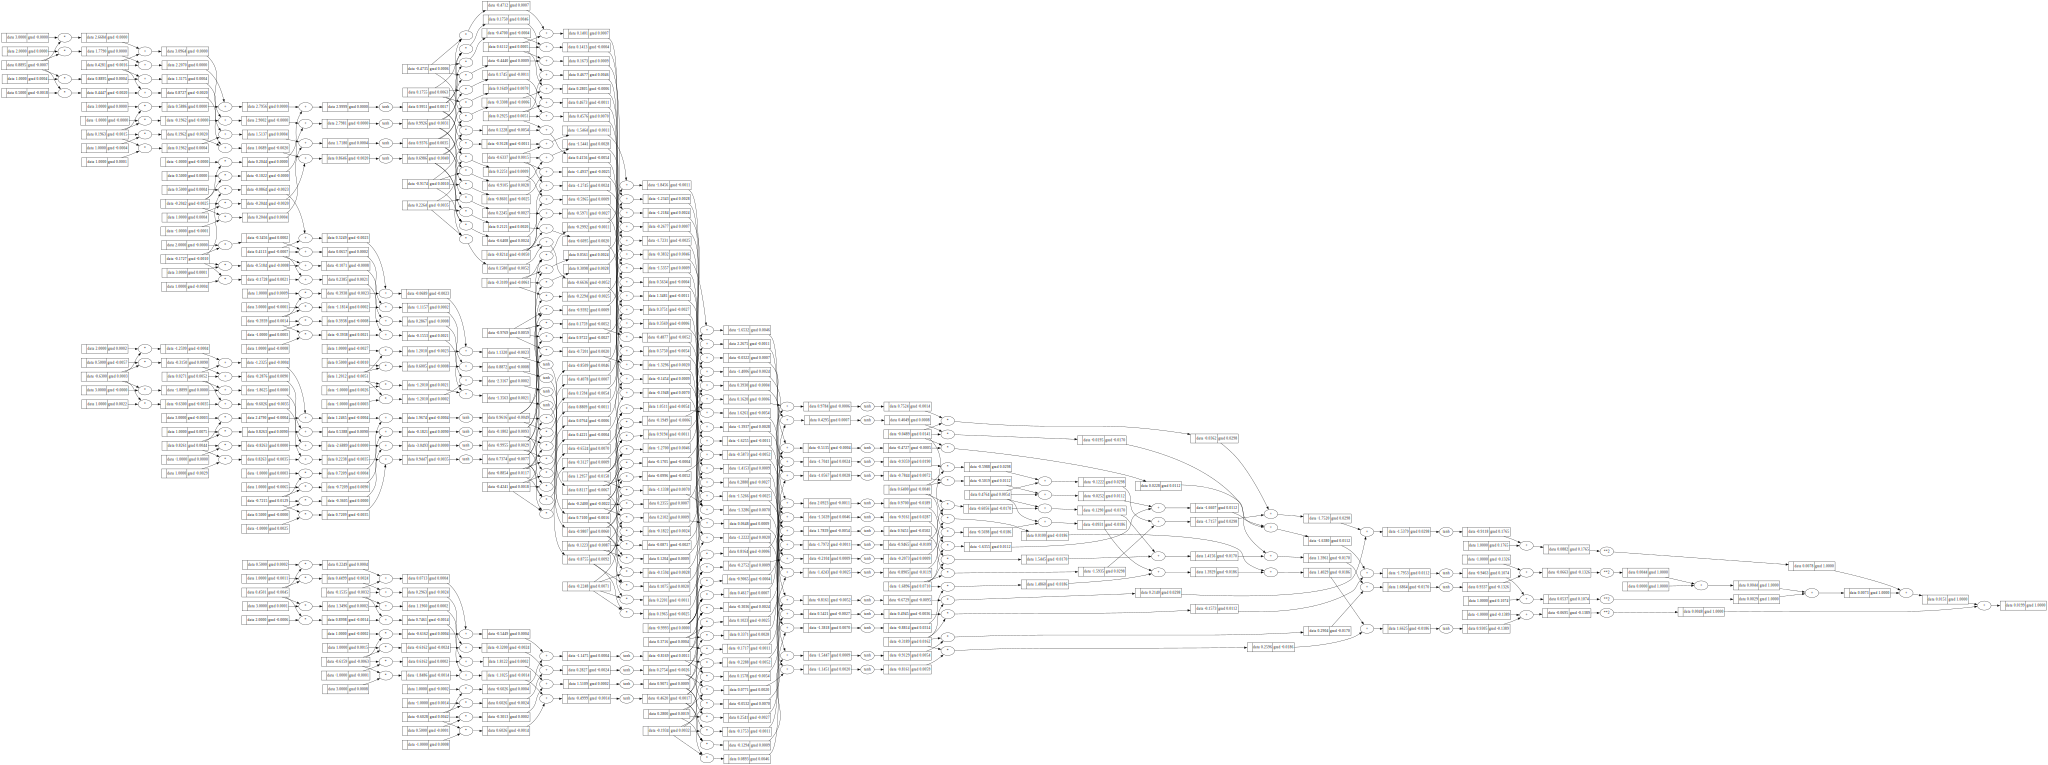

In [141]:
draw_dot(loss)

All materials are from Andrej Karpathy's Youtube channel: https://www.youtube.com/watch?v=VMj-3S1tku0&ab_channel=AndrejKarpathy

In [142]:
def unknown_target_function(x):
    return x**3 -24*x**2 +24

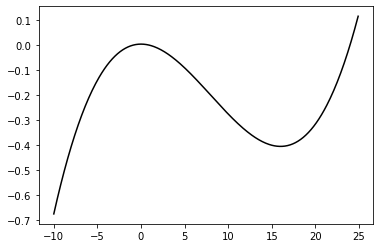

In [143]:
xs = np.arange(-10, 25, 0.1)
ys = unknown_target_function(xs) / 5000.0
plt.plot(xs, ys, color='black')

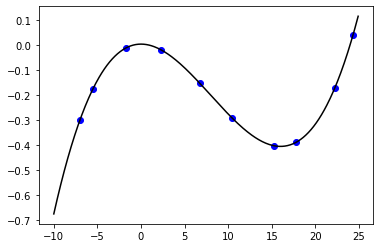

In [144]:
x_train = np.array([-7.0, -5.5, -1.75, 2.3, 6.75, 10.4, 15.2, 17.75, 22.23, 24.32])
y_train = unknown_target_function(x_train) / 5000.0
plt.scatter(x_train, y_train, color='blue')
plt.plot(xs, ys, color='black')

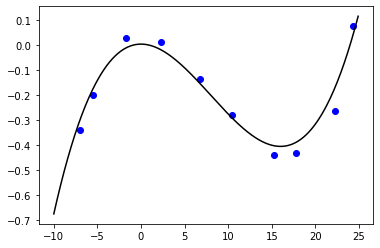

In [145]:
x_train = np.array([-7.0, -5.5, -1.75, 2.3, 6.75, 10.4, 15.2, 17.75, 22.23, 24.32])

noise = np.random.normal(0, .05, size=x_train.shape[0])
y_train = unknown_target_function(x_train) / 5000.0 + noise
plt.scatter(x_train, y_train, color='blue')
plt.plot(xs, ys, color='black')

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
X_train = np.expand_dims(x_train, axis=1)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

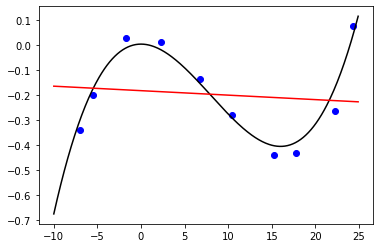

In [148]:
plt.scatter(x_train, y_train, color='blue'); plt.plot(xs, ys, color='black');
plt.plot(xs, reg.predict(np.expand_dims(xs, axis=1)), color='red');

In [149]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_train)
mean_squared_error(y_train, y_pred)

0.03170448815022726

In [150]:
net = MLP(1, [1])
net.parameters()

[Value(data=0.6227213701732832), Value(data=-0.6711318069140293)]

Challenge: Modify all the necessary classes $\texttt{Value}$, $\texttt{Neuron}$, $\texttt{Layer}$, and $\texttt{MLP}$ to build and train a simple linear regression model on the above dataset.